In [ ]:
from sklearn.model_selection import train_test_split as split
import pandas as pd

from src.data_util import load_data
from src.LogisticRegression import LRClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the data
headlines = load_data("../data/dataset.conllu")

# split into training and test sets
SEED = 42
train_headlines, other_headlines = split(headlines, test_size=0.3, random_state=SEED)
val_headlines, test_headlines = split(other_headlines, test_size=0.5, random_state=SEED)
print(f"Number of headlines for training, validation, and test is {len(train_headlines)}, {len(val_headlines)}, and {len(test_headlines)} resp.")

Number of headlines for training, validation, and test is 20033, 4293, and 4293 resp.


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      2218
           1       0.84      0.82      0.83      2075

    accuracy                           0.84      4293
   macro avg       0.84      0.84      0.84      4293
weighted avg       0.84      0.84      0.84      4293



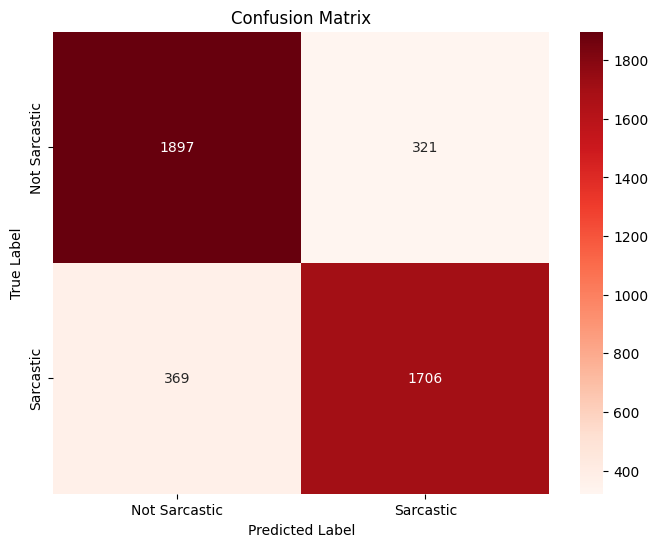

False positives and false negatives stored in self.false_positives_df and self.false_negatives_df.


In [ ]:
# fit logistic regression with bag of words vectorizer
logreg_BOW = LRClassifier(train_headlines, val_headlines, use_tfidf=False, remove_stopwords=False)
logreg_BOW.fit()

# Evaluate the model
logreg_BOW.evaluate(show_confusion_matrix=True)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2218
           1       0.82      0.84      0.83      2075

    accuracy                           0.84      4293
   macro avg       0.84      0.84      0.84      4293
weighted avg       0.84      0.84      0.84      4293



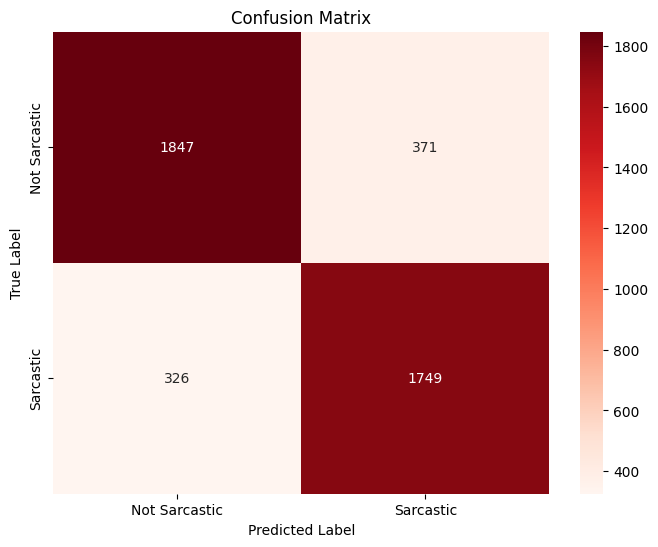

False positives and false negatives stored in self.false_positives_df and self.false_negatives_df.


In [ ]:
# fit logistic regression with TD-IDF vectorizer
logreg_tfidf = LRClassifier(train_headlines, val_headlines, use_tfidf=True, remove_stopwords=False)
logreg_tfidf.fit()

# Evaluate the model
logreg_tfidf.evaluate(show_confusion_matrix=True)

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      2218
           1       0.82      0.74      0.78      2075

    accuracy                           0.80      4293
   macro avg       0.80      0.80      0.80      4293
weighted avg       0.80      0.80      0.80      4293



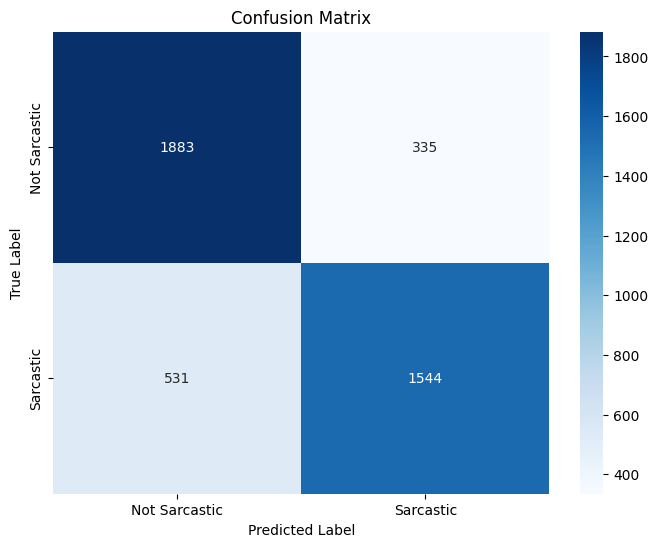

False positives and false negatives stored in self.false_positives_df and self.false_negatives_df.


In [ ]:
# fit logistic regression with Bag of Words vectorizer while removing stopwords
logreg_BOW_no_stopwords = LRClassifier(train_headlines, val_headlines, use_tfidf=False, remove_stopwords=True)
logreg_BOW_no_stopwords.fit()

# Evaluate the model
logreg_BOW_no_stopwords.evaluate(show_confusion_matrix=True)

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      2218
           1       0.82      0.75      0.78      2075

    accuracy                           0.80      4293
   macro avg       0.80      0.80      0.80      4293
weighted avg       0.80      0.80      0.80      4293



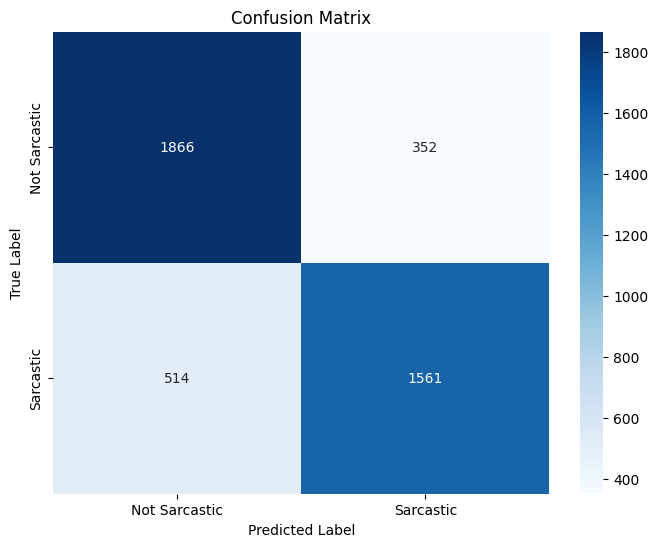

False positives and false negatives stored in self.false_positives_df and self.false_negatives_df.


In [ ]:
# fit logistic regression with TD-IDF vectorizer while removing stopwords
logreg_tdidf_no_stopwords = LRClassifier(train_headlines, val_headlines, use_tfidf=True, remove_stopwords=True)
logreg_tdidf_no_stopwords.fit()

# Evaluate the model
logreg_tdidf_no_stopwords.evaluate(show_confusion_matrix=True)

### Model Performance Summary

#### 1. **Bag of Words with Stopwords**
- **Accuracy**: 0.84
- **Recall for Sarcastic (Class 1)**: 0.82
- **Strength**: Balanced performance, good for both classes.

#### 2. **TF-IDF with Stopwords**
- **Accuracy**: 0.84
- **Recall for Sarcastic (Class 1)**: 0.84
- **Strength**: Best recall for sarcastic headlines, better at identifying sarcasm.

#### 3. **Bag of Words without Stopwords**
- **Accuracy**: 0.80
- **Recall for Sarcastic (Class 1)**: 0.74
- **Weakness**: Lower recall for sarcastic headlines, lower overall performance.

#### 4. **TF-IDF without Stopwords**
- **Accuracy**: 0.80
- **Recall for Sarcastic (Class 1)**: 0.75
- **Weakness**: Lower recall for sarcastic headlines, similar performance to Bag of Words without stopwords.

---

### **Recommendation**
The **TF-IDF with Stopwords** model is recommended for further analysis due to its highest recall for sarcastic headlines (0.84), making it the most effective at detecting sarcasm while maintaining balanced performance across both classes.


In [7]:
model = logreg_tfidf

# Error Analysis

## Close Calls

In the next cell we want to investigate, what kind of headlines the model is not sure about. The probability of 'Sarcasm' is around $0.5$ 

In [8]:
# panda display option so headlines dont get truncated
pd.set_option('display.max_colwidth', None)

false_positives_df = model.false_positives_df
false_negatives_df = model.false_negatives_df

# sort so the uncertain cases are on top
sorted_false_positives = false_positives_df.sort_values(by="Probability", ascending=True)
sorted_false_negatives = false_negatives_df.sort_values(by="Probability", ascending=False)

display(sorted_false_positives.head(20))
display(sorted_false_negatives.head(20))

,Index,Headline,True Class,Predicted Class,Probability
349,4047,"two more shipwrecks off libyan coast kill at least 239 migrants, u.n. says",0,1,0.500461
253,2788,this rescue pit bull made his bed every day while waiting to be adopted,0,1,0.500757
125,1463,changing residency standards attack student voters,0,1,0.501381
365,4231,a new chapter in u.s.-cuba relations,0,1,0.502330
277,3234,world's most innovative companies,0,1,0.502475
70,840,zoe saldana brings out tlc for incredible 'no scrubs' performance on 'lip sync battle',0,1,0.502504
21,257,hiv positive man hits london streets for 'heartwarming' experiment,0,1,0.502960
117,1354,o'casey's plays return to stage at philly irish theater,0,1,0.503166
318,3749,7 things that always go on sale in september,0,1,0.503485
355,4121,taraji p. henson reacts to first family's thoughts on 'empire',0,1,0.503924


,Index,Headline,True Class,Predicted Class,Probability
226,2979,"'that first date is going terribly,' think diners watching couple celebrate 5th anniversary",1,0,0.499980
54,640,isis having difficulty finding american recruits physically fit for jihad,1,0,0.499467
155,1973,trump boys set up 'don and eric law place' in white house electrical room to help dad with legal problems,1,0,0.499229
212,2799,ryan seacrest catches up with 'captain phillips' star maersk alabama on red carpet,1,0,0.497584
75,941,no one else but you invited to creepy dave's debate party,1,0,0.497536
91,1137,assistant uses cake to smuggle cake-decorating set to martha stewart,1,0,0.497483
301,3937,kerry volunteer gets some kerry-primary victory sex,1,0,0.497399
322,4253,jason statham beats wedding planner to death in new romantic comedy,1,0,0.496214
122,1539,new archaeological find suggests mary magdalene was actually a size 12,1,0,0.495536
222,2964,sex toy discreetly shipped in plain dildo-shaped box,1,0,0.495483


The false positives do not exhibit any specific features that might explain why the model detects sarcasm. Even very straightforward sentences, such as *"Robin Hood Foundation,"* are labeled as sarcastic. Similarly, the false negatives are not particularly egregious. Many of the "close" false negatives would be difficult for even a human with real-world knowledge to classify correctly. 

Overall, we conclude that the "close calls" made by the Logistic Regression model are reasonable. Many of the misclassified sarcastic headlines could just as easily be interpreted as non-sarcastic.


## Egregious Mistakes

Now we will take a look at biggest errors of the model and maybe find a trend.

In [ ]:
# sort so the high confidence cases are on top
sorted_false_positives = false_positives_df.sort_values(by="Probability", ascending=False)
sorted_false_negatives = false_negatives_df.sort_values(by="Probability", ascending=True)

display(sorted_false_positives.head(20))
display(sorted_false_negatives.head(20))

,Index,Headline,True Class,Predicted Class,Probability
12,163,danny masterson's publicist suggested a woman can't be raped by a man she's in a relationship with,0,1,0.914836
306,3614,"after decades of effort, chemists overseas report 'nano' breakthrough",0,1,0.884770
90,1042,death of d.c. man in security guard custody ruled a homicide,0,1,0.881380
243,2686,utah adopts nation's strictest drunk driving law,0,1,0.877538
170,1881,'affluenza' mom tonya couch has curfew eased so she can find a job,0,1,0.872154
362,4182,"after seeing a fifth-grader get bullied, this group of boys vowed to stand up for him",0,1,0.872047
299,3567,a new kind of valentine's day,0,1,0.867590
83,963,john kerry attempts to bully codepink into silence,0,1,0.844175
63,744,why it's ridiculous to report on every poll coming out of new hampshire,0,1,0.843570
233,2596,fired lesbian catholic school teacher locked out of archdiocese while trying to deliver petitions,0,1,0.842729


,Index,Headline,True Class,Predicted Class,Probability
316,4116,the cyberspace revolution: why are the media ignoring it?,1,0,0.002214
200,2671,"'donald trump is the 45th president of the united states,' spontaneously reports subconscious during first calm moment of day",1,0,0.021108
68,846,law enforcement questions why alton sterling was even black in the first place,1,0,0.024312
258,3449,white house: 'this is not the geologic era to debate gun control',1,0,0.024808
41,515,national security commission warns clinton: 'the call is coming from inside the house',1,0,0.026547
135,1687,germany disavows ties with the scorpions,1,0,0.037089
305,3995,mark zuckerberg: 'you should be grateful all your incessant oversharing online is actually worth something',1,0,0.047149
144,1767,"putin will try the, how you say, fried chicken",1,0,0.052820
13,123,newt gingrich: 'it's an honor to address a crowd that shares my utterly bizarre and unhealthy obsession with hillary clinton',1,0,0.060162
246,3257,kite flyer in the zone,1,0,0.082294


Upon reviewing the errors, a clear trend is not immediately apparent. However, it seems that many of the false positive headlines exhibit hyperbolic language or discuss outrageous topics. These characteristics could lead the model to incorrectly classify them as sarcastic. 

### Key Characteristics of False Positive Headlines:
- **Hyperbolic Style**: The false positive headlines often use exaggerated or overstated language. This hyperbole may cause the model to misinterpret the headlines as sarcastic, even though they are not intended to be. For example *"fired lesbian catholic school teacher locked out of archdiocese while trying to deliver petitions"*
  
- **Outrageous Claims**: Headlines that make outlandish or extreme claims tend to confuse the model. The outrageous nature of these claims—whether they involve absurd scenarios, inventions, or predictions—can make them appear sarcastic. *"epa accidentally spills millions of gallons of waste, turning river orange"*

### Conclusion

While we cannot immediately identify a single trend, the false positive headlines tend to exhibit hyperbolic language or discuss extreme topics, which may lead the model to classify them as sarcastic. To improve the model's accuracy, further refinements could focus on better distinguishing between sarcasm and hyperbole.


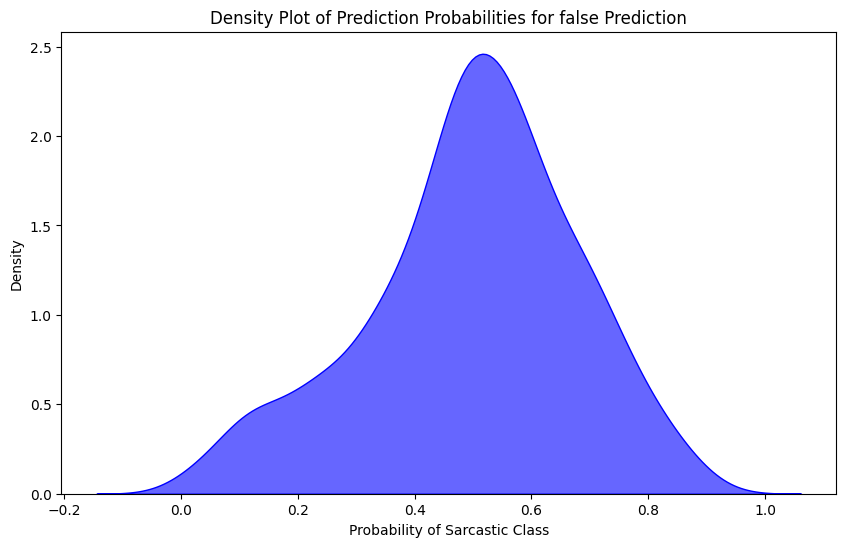

In [ ]:
# combine the two DataFrames
combined_df = pd.concat([false_positives_df, false_negatives_df])

# density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=combined_df, x='Probability', fill=True, color='blue', alpha=0.6)
plt.title('Density Plot of Prediction Probabilities for false Prediction')
plt.xlabel('Probability of Sarcastic Class')
plt.ylabel('Density')
plt.show()

,Word,Coefficient,Sentiment
0,nation,6.584371,Sarcastic
1,area,5.987461,Sarcastic
2,man,5.255032,Sarcastic
3,report,5.095047,Sarcastic
4,of,4.183920,Sarcastic
5,local,3.710259,Sarcastic
6,only,3.670062,Sarcastic
7,announces,3.462263,Sarcastic
8,fucking,3.291753,Sarcastic
9,study,3.227850,Sarcastic


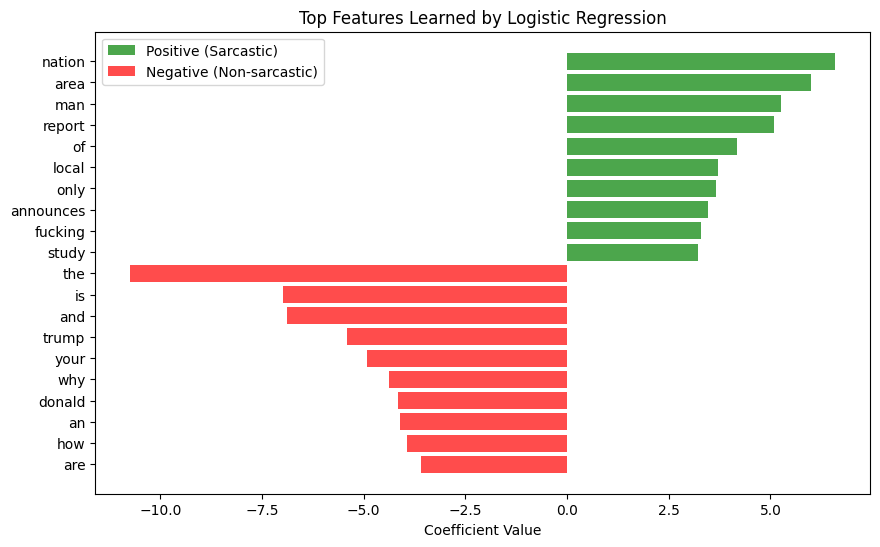

In [11]:
model.interpret_model(n_top_features=10)